100%|██████████| 9.91M/9.91M [00:00<00:00, 86.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 37.5MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 84.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.30MB/s]


Epoch [1/10], Loss: 0.0605
Epoch [2/10], Loss: 0.0322
Epoch [3/10], Loss: 0.0262
Epoch [4/10], Loss: 0.0231
Epoch [5/10], Loss: 0.0212
Epoch [6/10], Loss: 0.0196
Epoch [7/10], Loss: 0.0182
Epoch [8/10], Loss: 0.0172
Epoch [9/10], Loss: 0.0164
Epoch [10/10], Loss: 0.0157


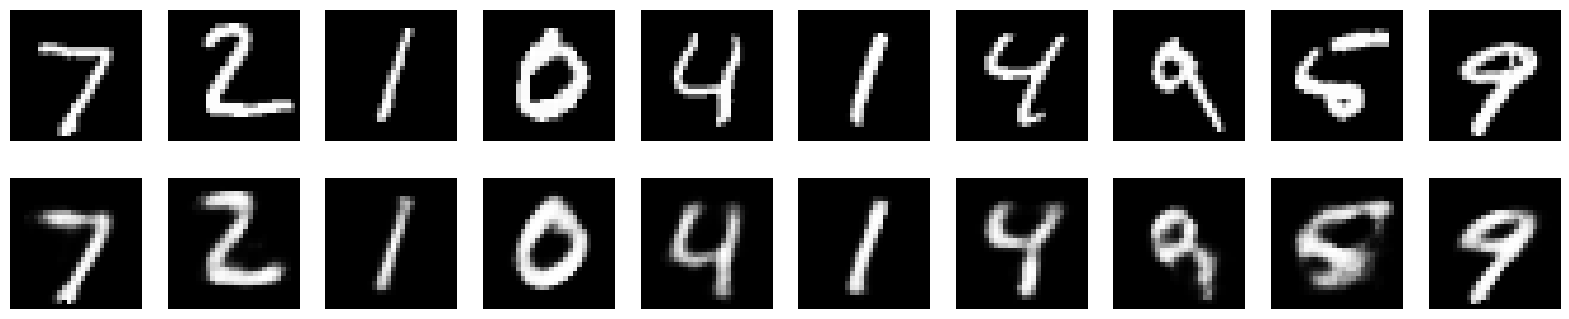

In [ ]:
# AUTOENCODER IMPLEMENTATION IN PYTORCH
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# ---- Load MNIST dataset ----
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

# ---- Define Autoencoder ----
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 16)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# ---- Initialize model, loss, optimizer ----
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ---- Train the model ----
epochs = 10
for epoch in range(epochs):
    total_loss = 0
    for data, _ in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data.view(-1, 28*28))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

# ---- Test and visualize ----
test_images, _ = next(iter(test_loader))
with torch.no_grad():
    reconstructed = model(test_images)

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].view(28, 28).cpu(), cmap='gray')
    plt.axis('off')
    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].view(28, 28).cpu(), cmap='gray')
    plt.axis('off')
plt.show()
